In [36]:
import graphviz as gv

In [37]:
def to_list(State): 
    return [list(row) for row in State]

In [38]:
def to_tuple(State):
    return tuple(tuple(row) for row in State)

# Suchprobleme

## Breitensuche (Breadth First Search)

In [39]:
def path_to(state, Parent):
    p = Parent[state]
    if p == state:
        return [state]
    return path_to(p, Parent) + [state]

In [40]:
def bfs_search(start, goal, next_states):
    Frontier = { start }
    Visited  = set()
    Parent   = { start: start }
    while Frontier:
        NewFrontier = set()
        for s in Frontier:
            for ns in next_states(s):
                if ns not in Visited and ns not in Frontier:
                    NewFrontier.add(ns)
                    Parent[ns] = s
                    if ns == goal:
                        print("number of states: ", len(Visited) + len(Frontier) + len(NewFrontier))
                        return path_to(goal, Parent)
        Visited |= Frontier
        Frontier = NewFrontier

### Beispiel Missionare

$\texttt{problem}(m, i)$ is `True` if there is a problem on a shore that has $m$ missionaries and $i$ infidels.
For a problem to arise, the number $m$ of missionaries needs to be greater than $0$ but less than the number $i$ of
infidels.

In [41]:
def problem(m, i): 
    return 0 < m < i

def no_problem(m, i): 
    return not problem(m, i) and not problem(3 - m, 3 - i)

In [42]:
def next_states_mis(state):
    m, i, b = state
    if  b == 1:
        return { (m-mb, i-ib, 0) for mb in range(m+1)
                                 for ib in range(i+1)
                                 if 1 <= mb + ib <= 2 and no_problem(m-mb, i-ib) 
               }
    else:
        return { (m+mb, i+ib, 1) for mb in range(3-m+1)
                                 for ib in range(3-i+1)
                                 if 1 <= mb + ib <= 2 and no_problem(m+mb, i+ib) 
               }

In [43]:
def toDot(source, goal, Edges, Frontier, Visited, Parent=None):
    V = set()
    for x, L in Edges.items():
        V.add(x)
        for y in L:
            V.add(y)
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    dot.attr(rankdir='LR')
    for x in V:
        if x == source:
            dot.node(str(x), color='blue', shape='doublecircle')
        elif x in Frontier and x == goal:
            dot.node(str(x), label=str(x), color='magenta')
        elif x in Frontier:
            dot.node(str(x), label=str(x), color='red')
        elif x in Visited:
            dot.node(str(x), label=str(x), color='blue')
        else:
            dot.node(str(x), label=str(x))
    if Parent:        
        Path = path_to(goal, Parent)
    for u in V:
        if Edges.get(u):
            for v in Edges[u]:
                if Parent and v in Path and Parent[v] == u:
                    dot.edge(str(u), str(v), color='brown', style='bold')                    
                else:
                    dot.edge(str(u), str(v))
    return dot

In [44]:
def tripleToStr(t):
    return '(' + str(t[0]) + ',' + str(t[1]) + ',' + str(t[2]) + ')'

def dot_graph(R):
    """This function takes binary relation R as inputs and shows this relation as
       a graph using the module graphviz.
    """
    dot = gv.Digraph()
    dot.attr(rankdir='LR')
    Nodes = { tripleToStr(a) for (a,b) in R } | { tripleToStr(b) for (a,b) in R }
    for n in Nodes:
        dot.node(n)
    for (x, y) in R:
        dot.edge(tripleToStr(x), tripleToStr(y))
    return dot

In [45]:
def createRelation(start):
    oldM = set()
    M    = { start }
    R    = set()
    while True:
        oldM = M.copy()
        M |= { y for x in M
                 for y in next_states_mis(x)
             }
        if M == oldM:
            break
    return { (x, y) for x in M
                    for y in next_states_mis(x)
           }

Initially, all missionaries, all infidels and the boat are on the left shore.
The goal is to have everybody on the right shore, hence the numbers on the left shore
should all be $0$.

In [46]:
start = (3, 3, 1)
goal  = (0, 0, 0)

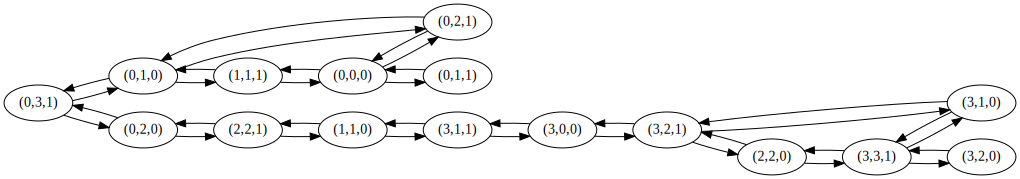

In [47]:
dot_graph(createRelation(start))

In [48]:
def fillCharsLeft(x, n):
    s = str(x)
    m = n - len(s)
    return m * " " + s

def fillCharsRight(x, n):
    s = str(x)
    m = n - len(s)
    return s + m * " "

def fillCharsBoth(x, n):
    s  = str(x)
    ml = (n     - len(s)) // 2
    mr = (n + 1 - len(s)) // 2
    return ml * " " + s + mr * " "

def printState(m, k, b):
     print( fillCharsRight(m * "M", 6) + 
            fillCharsRight(k * "K", 6) + 
            fillCharsRight(b * "B", 3) + "    |~~~~~|    " + 
            fillCharsLeft((3 - m) * "M", 6) + 
            fillCharsLeft((3 - k) * "K", 6) + 
            fillCharsLeft((1 - b) * "B", 3) 
          )

def printBoat(m1, k1, b1, m2, k2, b2):
    if b1 == 1:
        if m1 < m2:
            print("Error in printBoat: negative number of missionaries in the boat!")
            return
        if k1 < k2:
            print("Error in printBoat: negative number of infidels in the boat!")
            return
        print(19*" " + "> " + fillCharsBoth((m1-m2)*"M" + " " + (k1-k2)*"K", 3) + " >")
    else:
        if m1 > m2:
            print("Error in printBoat: negative number of missionaries in the boat!")
            return
        if k1 > k2:
            print("Error in printBoat: negative number of infidels in the boat!")
            return
        print(19*" " + "< " + fillCharsBoth((m2-m1)*"M" + " " + (k2-k1)*"K", 3) + " <")

def printPath(Path):
    print("Solution:\n")
    for i in range(len(Path) - 1):
        m1, k1, b1 = Path[i]
        m2, k2, b2 = Path[i+1]
        printState(m1, k1, b1)
        printBoat(m1, k1, b1, m2, k2, b2)
    m, k, b = Path[-1]
    printState(m, k, b)

In [49]:
%%time
Path = bfs_search(start, goal, next_states_mis)
printPath(Path)

number of states:  15
Solution:

MMM   KKK   B      |~~~~~|                   
                   > M K >
MM    KK           |~~~~~|         M     K  B
                   < M   <
MMM   KK    B      |~~~~~|               K   
                   >  KK >
MMM                |~~~~~|             KKK  B
                   <  K  <
MMM   K     B      |~~~~~|              KK   
                   > MM  >
M     K            |~~~~~|        MM    KK  B
                   < M K <
MM    KK    B      |~~~~~|         M     K   
                   > MM  >
      KK           |~~~~~|       MMM     K  B
                   <  K  <
      KKK   B      |~~~~~|       MMM         
                   >  KK >
      K            |~~~~~|       MMM    KK  B
                   <  K  <
      KK    B      |~~~~~|       MMM     K   
                   >  KK >
                   |~~~~~|       MMM   KKK  B
CPU times: total: 0 ns
Wall time: 0 ns


## Beispiel Sliding Puzzle

### Animation

The package `ipycanvas`, which is imported below, can be installed using the following command:
```
    conda install -c conda-forge ipycanvas
```
This package is useful for drawings and animations.  Its documentation can be found at:
  https://ipycanvas.readthedocs.io/en/latest/.

In [50]:
import ipycanvas as cnv

The module `time` is part of the standard library, so it is preinstalled.  We have imported it because we need the function `time.sleep(secs)` to pause the animation for a specified time.

In [51]:
import time

The global variable `Colors` specifies the colors of the tiles.

In [52]:
Colors = ['white', 'lightblue', 'pink', 'magenta', 'orange', 'red', 'yellow', 'lightgreen', 'gold',
          'CornFlowerBlue', 'Coral', 'Cyan', 'orchid', 'DarkSalmon', 'DeepPink', 'green'
         ] 

The global variable `size` specifies the size of one tile in pixels.

In [53]:
size = 100

The function `draw(State, canvas, dx, dy, tile, x)` draws a given `State` of the sliding puzzle, where `tile` has been moved by `offset` pixels into the direction `(dx, dy)`.

In [54]:
def draw(State, canvas, dx, dy, tile, offset):
    canvas.text_align    = 'center'
    canvas.text_baseline = 'middle'
    with cnv.hold_canvas(canvas):
        canvas.clear()
        n = len(State)
        for row in range(n):
            for col in range(n):
                tile_to_draw = State[row][col]
                color = Colors[tile_to_draw]
                canvas.fill_style = color
                if tile_to_draw not in (0, tile):
                    x = col * size
                    y = row * size
                    canvas.fill_rect(x, y, size, size)
                    canvas.line_width = 3.0
                    x += size // 2
                    y += size // 2
                    canvas.stroke_text(str(tile_to_draw), x, y)
                elif tile_to_draw == tile:
                    x = col * size + offset * dx
                    y = row * size + offset * dy
                    canvas.fill_rect(x, y, size, size)
                    canvas.line_width = 3.0
                    x += size // 2
                    y += size // 2
                    if tile_to_draw != 0:
                        canvas.stroke_text(str(tile_to_draw), x, y)

In [55]:
def create_canvas(n): 
    canvas = cnv.Canvas(size=(size * n, size * n))
    canvas.font = '100px serif'
    return canvas

The global variable `delay` controls the speed of the animation.

In [65]:
delay = 0.0005

The function call `tile_and_direction(state, next_state)` takes a state and the state that follows this state and returns a triple `(tile, dx, dy)` where `tile` is the tile that is moved to transform `state` into `next_state` and `(dx, dy)` is the direction in which this tile is moved.

In [57]:
def tile_and_direction(state, next_state):
    row0, col0 = find_tile(0, state)
    row1, col1 = find_tile(0, next_state)
    return state[row1][col1], col0-col1, row0-row1

Given a list of states representing a solution to the sliding puzzle, the function call 
`animation(Solution)` animates the solution.

In [58]:
def animation(Solution):
    start = Solution[0]
    n = len(start)
    canvas = create_canvas(n)
    draw(start, canvas, 0, 0, 0, 0)
    m = len(Solution)
    display(canvas)
    for i in range(m-1):
        state = Solution[i]
        tile, dx, dy = tile_and_direction(state, Solution[i+1])
        for offset in range(size+1):
            draw(state, canvas, dx, dy, tile, offset)
            time.sleep(delay)

### Code

In [59]:
def move_dir(State, row, col, dx, dy):
    State = to_list(State)
    State[row     ][col     ] = State[row + dx][col + dy]
    State[row + dx][col + dy] = 0
    return to_tuple(State)

In [60]:
def find_tile(tile, State):
    n = len(State)
    for row in range(n):
        for col in range(n):
            if State[row][col] == tile:
                return row, col

In [61]:
def next_states_sliding(State):
    n          = len(State)
    row, col   = find_tile(0, State)
    New_States = set()
    Directions = [ (1, 0), (-1, 0), (0, 1), (0, -1) ]
    for dx, dy in Directions:
        if row + dx in range(n) and col + dy in range(n):
            New_States.add(move_dir(State, row, col, dx, dy))
    return New_States

In [62]:
start = ( (8, 0, 6),
          (5, 4, 7),
          (2, 3, 1)
        )
goal = ( (0, 1, 2), 
         (3, 4, 5), 
         (6, 7, 8)
       )

In [63]:
%%time
Path = bfs_search(start, goal, next_states_sliding)
print(Path)

number of states:  181440
[((8, 0, 6), (5, 4, 7), (2, 3, 1)), ((8, 4, 6), (5, 0, 7), (2, 3, 1)), ((8, 4, 6), (0, 5, 7), (2, 3, 1)), ((8, 4, 6), (2, 5, 7), (0, 3, 1)), ((8, 4, 6), (2, 5, 7), (3, 0, 1)), ((8, 4, 6), (2, 0, 7), (3, 5, 1)), ((8, 4, 6), (2, 7, 0), (3, 5, 1)), ((8, 4, 6), (2, 7, 1), (3, 5, 0)), ((8, 4, 6), (2, 7, 1), (3, 0, 5)), ((8, 4, 6), (2, 0, 1), (3, 7, 5)), ((8, 4, 6), (0, 2, 1), (3, 7, 5)), ((0, 4, 6), (8, 2, 1), (3, 7, 5)), ((4, 0, 6), (8, 2, 1), (3, 7, 5)), ((4, 6, 0), (8, 2, 1), (3, 7, 5)), ((4, 6, 1), (8, 2, 0), (3, 7, 5)), ((4, 6, 1), (8, 0, 2), (3, 7, 5)), ((4, 6, 1), (0, 8, 2), (3, 7, 5)), ((4, 6, 1), (3, 8, 2), (0, 7, 5)), ((4, 6, 1), (3, 8, 2), (7, 0, 5)), ((4, 6, 1), (3, 0, 2), (7, 8, 5)), ((4, 0, 1), (3, 6, 2), (7, 8, 5)), ((0, 4, 1), (3, 6, 2), (7, 8, 5)), ((3, 4, 1), (0, 6, 2), (7, 8, 5)), ((3, 4, 1), (6, 0, 2), (7, 8, 5)), ((3, 0, 1), (6, 4, 2), (7, 8, 5)), ((3, 1, 0), (6, 4, 2), (7, 8, 5)), ((3, 1, 2), (6, 4, 0), (7, 8, 5)), ((3, 1, 2), (6, 4, 5), (7, 8

In [66]:
animation(Path)

Canvas()